### Conjunto de dados de funcionários
Contexto: Este conjunto de dados contém informações sobre os funcionários de uma empresa, incluindo suas origens educacionais, histórico de trabalho, dados demográficos e fatores relacionados ao emprego. Ele foi anonimizado para proteger a privacidade e, ao mesmo tempo, fornecer informações valiosas sobre a força de trabalho.(Fonte:https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [6]:
df.loc[:, ["Age", "Gender"]]

,Age,Gender
0,34,Male
1,28,Female
2,38,Female
3,27,Male
4,24,Male
...,...,...
4648,26,Female
4649,37,Male
4650,27,Male
4651,30,Male


In [31]:
# Usando a função query, vamos procurar por pessoas com idade de 25 anos:
df_consulta = df.query("Age == 25")
#df_consulta.head()
df_consulta.shape

(418, 9)

In [33]:
# A função query também pode ser utilizada para filtrar baseada em uma lista de valores
df_consulta = df.query(" PaymentTier in (1,3)")
#df_consulta.head()
df_consulta.shape

(3735, 9)

In [7]:
# Agrupar funcionárias/os por gênero
dado_agrupadoGenero = df.groupby('Gender')

# Contagem de funcionárias/os por gênero, usando os dados agrupados no passo anterior
contagem_funcionariosGenero = dado_agrupadoGenero['Gender'].count()

print("Contagem de passageiros por Gênero")
print(contagem_funcionariosGenero)



Contagem de passageiros por Gênero
Gender
Female    1875
Male      2778
Name: Gender, dtype: int64


In [22]:
#Obter a média da idade das funcionárias/os por genero:
media_genero = dado_agrupadoGenero['Age'].mean()

print("Média de Idade de passageiros por gênero")
print(media_genero)

Média de Idade de passageiros por gênero
Gender
Female    29.41600
Male      29.37797
Name: Age, dtype: float64


<Axes: xlabel='Gender'>

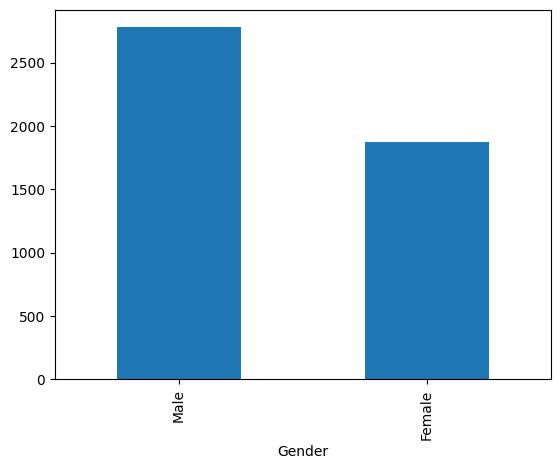

In [8]:
funcionarios_genero = df['Gender'].value_counts()
funcionarios_genero.plot(kind='bar')

In [9]:
df_filtroIdade = df[df['Age'] > 30]
df_filtroIdade.head

<bound method NDFrame.head of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
6     Bachelors         2015  New Delhi            3   38    Male          No   
7     Bachelors         2016  Bangalore            3   34  Female          No   
9       Masters         2017  New Delhi            2   37    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4643  Bachelors         2013  Bangalore            3   31  Female          No   
4644  Bachelors         2015       Pune            3   32  Female         Yes   
4645    Masters         2017       Pune            2   31  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes  

In [12]:
# Verificando quantas dessas pessoas mais de 30 anos são mulheres:
df_filtrado = df[(df['Age'] > 30) & (df['Gender'] == 'Female')]
#df_filtrado.shape
df_filtrado.head

<bound method NDFrame.head of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
2     Bachelors         2014  New Delhi            3   38  Female          No   
7     Bachelors         2016  Bangalore            3   34  Female          No   
16    Bachelors         2014  Bangalore            3   34  Female          No   
28    Bachelors         2013       Pune            2   31  Female          No   
34    Bachelors         2017       Pune            2   37  Female          No   
...         ...          ...        ...          ...  ...     ...         ...   
4641  Bachelors         2016  Bangalore            1   33  Female          No   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4643  Bachelors         2013  Bangalore            3   31  Female          No   
4644  Bachelors         2015       Pune            3   32  Female         Yes   
4645    Masters         2017       Pune            2   31  Female          No  

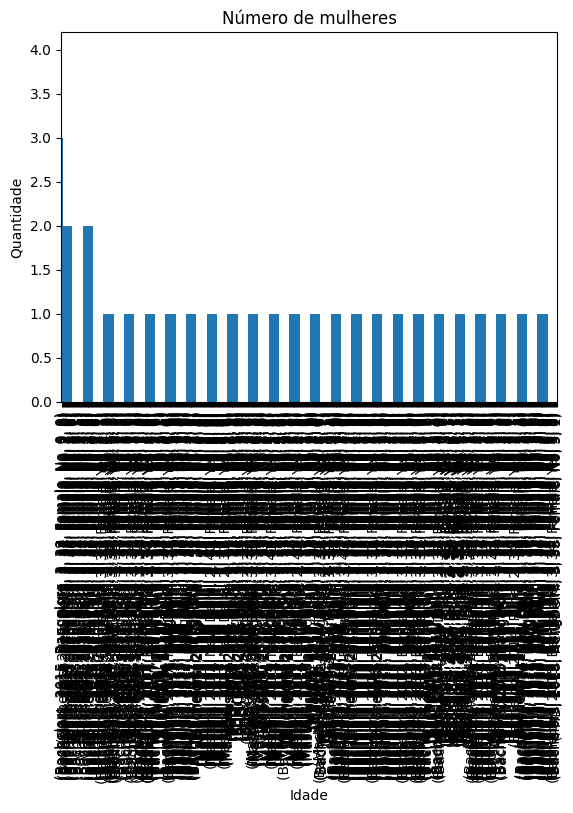

In [25]:
contagem_mulheres = df_filtrado.value_counts()
contagem_mulheres.plot(kind='bar')

plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Número de mulheres')
plt.show()

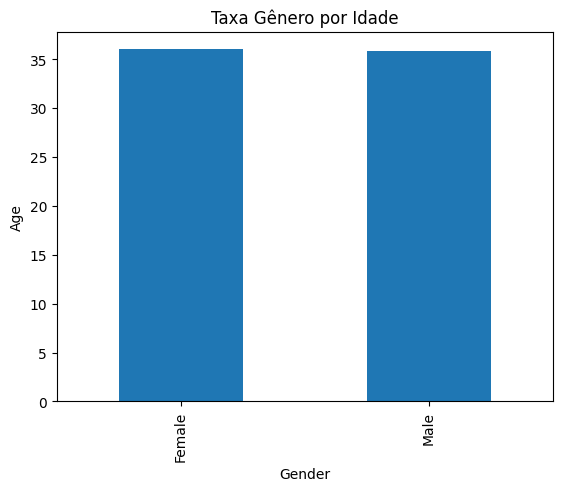

In [27]:
taxa_generoIdade = df_filtroIdade.groupby('Gender')['Age'].mean()
taxa_generoIdade.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Taxa Gênero por Idade')

plt.show()